In [36]:
import pandas as pd  # pyright: ignore[reportMissingImports]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # pyright: ignore[reportMissingModuleSource]
import plotly.express as px  # pyright: ignore[reportMissingImports]
import plotly.graph_objects as go  # pyright: ignore[reportMissingImports]
import plotly.io as pio  # pyright: ignore[reportMissingImports]


In [37]:
df = pd.read_csv('final_data.csv')

df.head()

,ISO_A0,calendar_start_date,dengue_total,region,year,month,quarter,day_of_year,is_rainy_season,month_sin,...,temp_min,temp_max,humidity,pressure,wind_speed,rainfall,temp_optimal,temp_too_cold,temp_too_hot,humidity_high
0,BGD,1980-01-01,4,SEARO,1980,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
1,BGD,1985-01-01,0,SEARO,1985,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
2,BGD,1986-01-01,0,SEARO,1986,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
3,BGD,1987-01-01,0,SEARO,1987,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
4,BGD,1988-01-01,0,SEARO,1988,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0


In [38]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41997 entries, 0 to 41996
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO_A0                           41997 non-null  object 
 1   calendar_start_date              41997 non-null  object 
 2   dengue_total                     41997 non-null  int64  
 3   region                           41997 non-null  object 
 4   year                             41997 non-null  int64  
 5   month                            41997 non-null  int64  
 6   quarter                          41997 non-null  int64  
 7   day_of_year                      41997 non-null  int64  
 8   is_rainy_season                  41997 non-null  int64  
 9   month_sin                        41997 non-null  float64
 10  month_cos                        41997 non-null  float64
 11  day_of_year_sin                  41997 non-null  float64
 12  day_of_year_cos   

# Complete Dengue Outbreak Prediction Pipeline

## Phase 1: Data Loading & Exploration


In [39]:
# Basic data information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"Rows: {len(df):,}")
print(f"\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")
    
print(f"\nData Types:")
print(df.dtypes.value_counts())


DATASET OVERVIEW
Shape: (41997, 54)

Columns: 54
Rows: 41,997

Missing Values:
No missing values found!

Data Types:
float64    39
int64      12
object      3
Name: count, dtype: int64


In [40]:
# Summary statistics for target variable and key features
print("=" * 60)
print("TARGET VARIABLE: dengue_total")
print("=" * 60)
print(df['dengue_total'].describe())

print("\n" + "=" * 60)
print("KEY FEATURES SUMMARY")
print("=" * 60)
key_features = ['dengue_total', 'temperature', 'humidity', 'rainfall', 
                'cases_lag_7d', 'cases_rolling_mean_7d', 'cases_rolling_mean_30d']
key_features = [f for f in key_features if f in df.columns]
print(df[key_features].describe())


TARGET VARIABLE: dengue_total
count     41997.000000
mean        431.791342
std        3324.628277
min           0.000000
25%           6.000000
50%          24.000000
75%          98.000000
max      174285.000000
Name: dengue_total, dtype: float64

KEY FEATURES SUMMARY
        dengue_total   temperature  humidity     rainfall   cases_lag_7d  \
count   41997.000000  41997.000000   41997.0  41997.00000   41997.000000   
mean      431.791342     26.451961      70.0    140.28252     374.616949   
std      3324.628277      2.600061       0.0    126.13181    3195.595273   
min         0.000000     22.000000      70.0     10.00000       0.000000   
25%         6.000000     24.000000      70.0     20.00000       4.000000   
50%        24.000000     27.000000      70.0     80.00000      21.000000   
75%        98.000000     28.000000      70.0    280.00000      86.000000   
max    174285.000000     30.000000      70.0    350.00000  174285.000000   

       cases_rolling_mean_7d  cases_rolling_

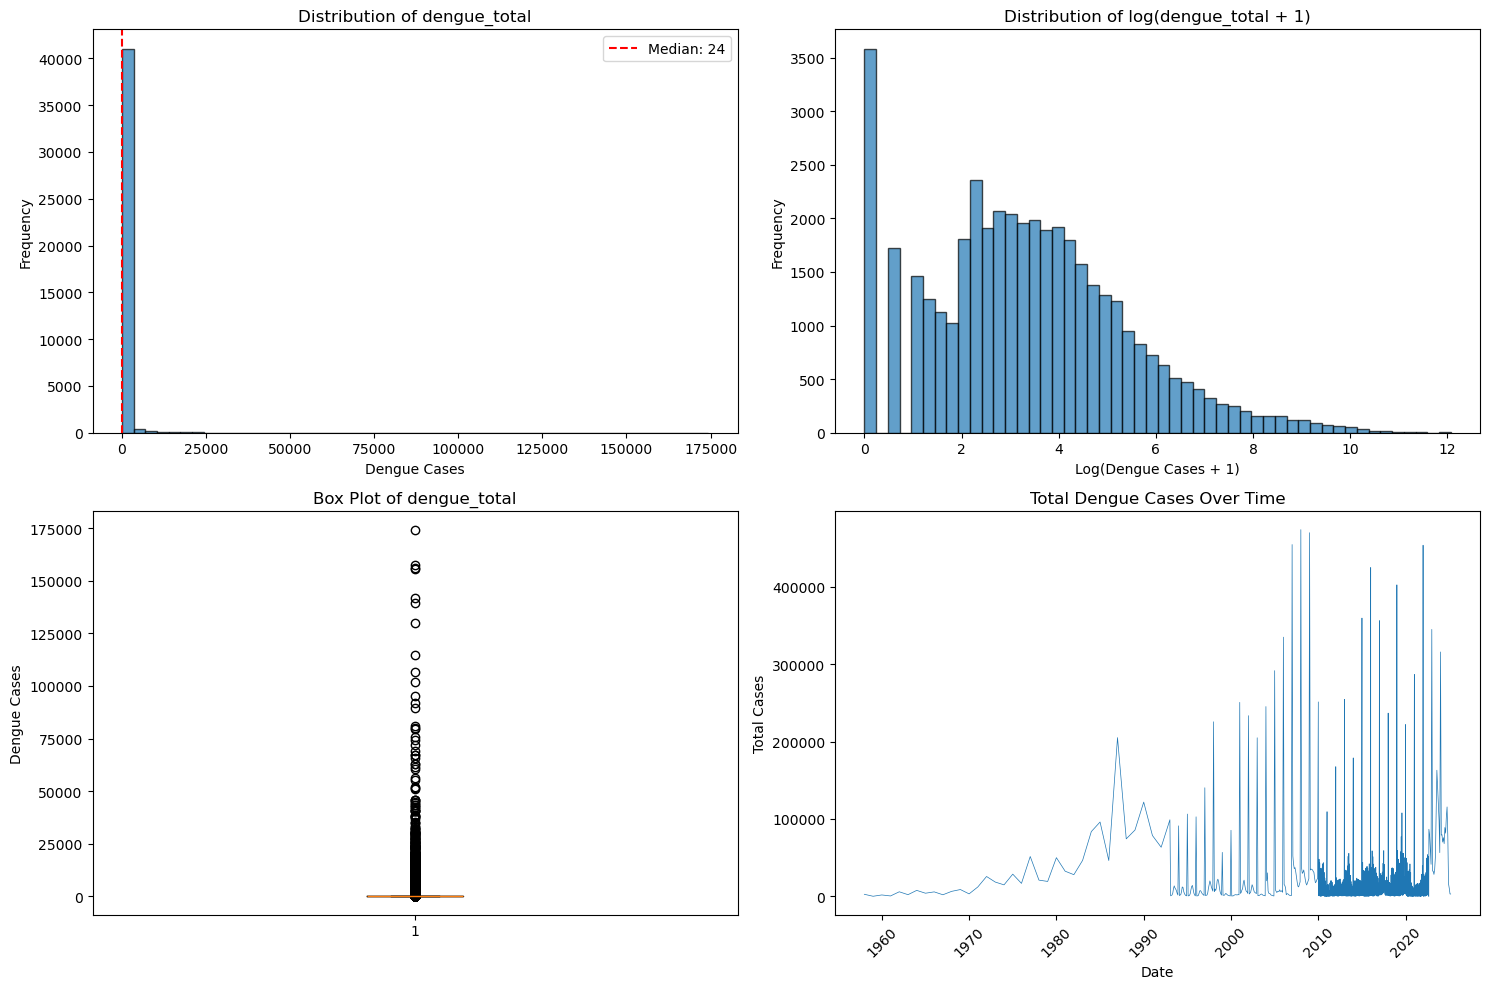

Target Statistics:
  Mean: 431.79
  Median: 24.00
  Std: 3324.63
  Min: 0
  Max: 174285
  Skewness: 25.70


In [41]:
# Convert date column
df['calendar_start_date'] = pd.to_datetime(df['calendar_start_date'])

# Visualize target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['dengue_total'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of dengue_total')
axes[0, 0].set_xlabel('Dengue Cases')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['dengue_total'].median(), color='r', linestyle='--', label=f'Median: {df["dengue_total"].median():.0f}')
axes[0, 0].legend()

# Log transformation
axes[0, 1].hist(np.log1p(df['dengue_total']), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of log(dengue_total + 1)')
axes[0, 1].set_xlabel('Log(Dengue Cases + 1)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
axes[1, 0].boxplot(df['dengue_total'], vert=True)
axes[1, 0].set_title('Box Plot of dengue_total')
axes[1, 0].set_ylabel('Dengue Cases')

# Time series plot (sample)
df_sample = df.groupby('calendar_start_date')['dengue_total'].sum().reset_index()
df_sample = df_sample.sort_values('calendar_start_date')
axes[1, 1].plot(df_sample['calendar_start_date'], df_sample['dengue_total'], linewidth=0.5)
axes[1, 1].set_title('Total Dengue Cases Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Cases')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Target Statistics:")
print(f"  Mean: {df['dengue_total'].mean():.2f}")
print(f"  Median: {df['dengue_total'].median():.2f}")
print(f"  Std: {df['dengue_total'].std():.2f}")
print(f"  Min: {df['dengue_total'].min()}")
print(f"  Max: {df['dengue_total'].max()}")
print(f"  Skewness: {df['dengue_total'].skew():.2f}")


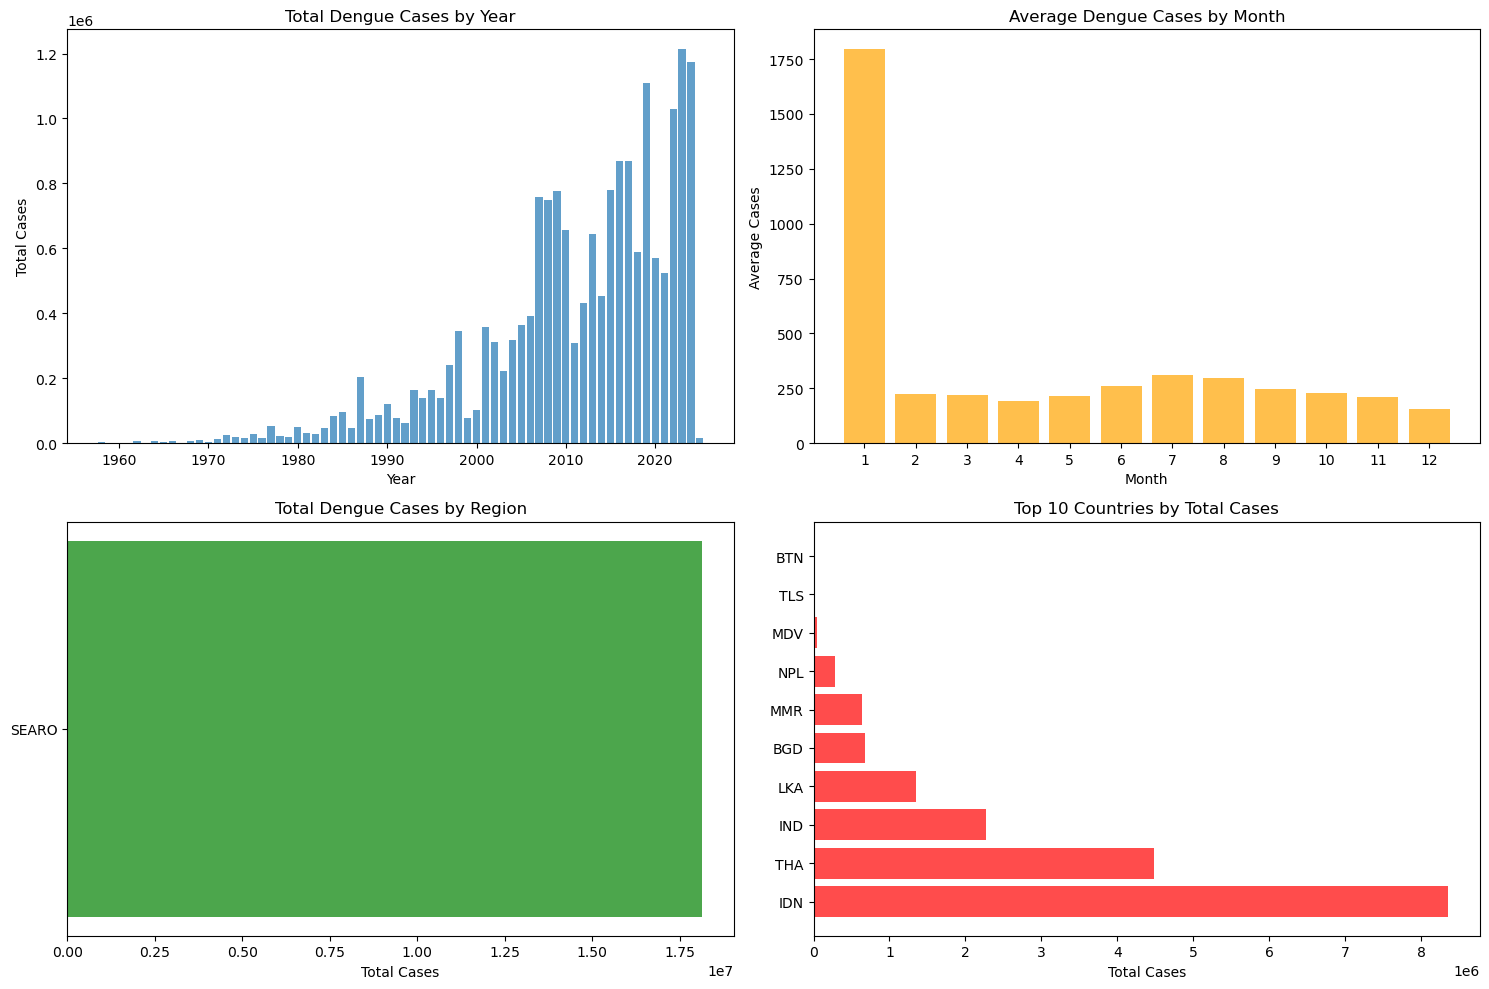

In [42]:
# Explore temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# By year
yearly = df.groupby('year')['dengue_total'].sum().reset_index()
axes[0, 0].bar(yearly['year'], yearly['dengue_total'], alpha=0.7)
axes[0, 0].set_title('Total Dengue Cases by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Cases')

# By month
monthly = df.groupby('month')['dengue_total'].mean().reset_index()
axes[0, 1].bar(monthly['month'], monthly['dengue_total'], alpha=0.7, color='orange')
axes[0, 1].set_title('Average Dengue Cases by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Cases')
axes[0, 1].set_xticks(range(1, 13))

# By region
regional = df.groupby('region')['dengue_total'].sum().sort_values(ascending=False).reset_index()
axes[1, 0].barh(regional['region'], regional['dengue_total'], alpha=0.7, color='green')
axes[1, 0].set_title('Total Dengue Cases by Region')
axes[1, 0].set_xlabel('Total Cases')

# By country (ISO_A0)
country = df.groupby('ISO_A0')['dengue_total'].sum().sort_values(ascending=False).head(10).reset_index()
axes[1, 1].barh(country['ISO_A0'], country['dengue_total'], alpha=0.7, color='red')
axes[1, 1].set_title('Top 10 Countries by Total Cases')
axes[1, 1].set_xlabel('Total Cases')

plt.tight_layout()
plt.show()


## Phase 2: Outlier Detection & Handling


In [43]:
from scipy import stats
from sklearn.ensemble import IsolationForest

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude identifier columns
numeric_cols = [col for col in numeric_cols if col not in ['year', 'month', 'quarter', 'day_of_year', 'period_length']]

print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

# Method 1: IQR Method
print("\n1. IQR METHOD")
print("-" * 60)
iqr_outliers = {}
for col in numeric_cols[:10]:  # Check first 10 numeric columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outliers[col] = len(outliers)
    if len(outliers) > 0:
        print(f"{col:30s}: {len(outliers):6d} outliers ({len(outliers)/len(df)*100:.2f}%)")

# Focus on target variable
col = 'dengue_total'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
target_outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\n{'dengue_total':30s}: {len(target_outliers_iqr):6d} outliers ({len(target_outliers_iqr)/len(df)*100:.2f}%)")
print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")


OUTLIER DETECTION

1. IQR METHOD
------------------------------------------------------------
dengue_total                  :   6013 outliers (14.32%)
cases_lag_1d                  :   5990 outliers (14.26%)
cases_lag_7d                  :   5847 outliers (13.92%)
cases_lag_14d                 :   5812 outliers (13.84%)
cases_lag_30d                 :   5888 outliers (14.02%)

dengue_total                  :   6013 outliers (14.32%)
  Q1: 6.00, Q3: 98.00, IQR: 92.00
  Lower bound: -132.00, Upper bound: 236.00


In [44]:
# Method 2: Z-Score Method
print("\n2. Z-SCORE METHOD (|z| > 3)")
print("-" * 60)
z_outliers = {}
for col in numeric_cols[:10]:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = z_scores > 3
    z_outliers[col] = outliers.sum()
    if outliers.sum() > 0:
        print(f"{col:30s}: {outliers.sum():6d} outliers ({outliers.sum()/len(df)*100:.2f}%)")

# Focus on target variable
col = 'dengue_total'
z_scores = np.abs(stats.zscore(df[col]))
target_outliers_z = df[z_scores > 3]
print(f"\n{'dengue_total':30s}: {len(target_outliers_z):6d} outliers ({len(target_outliers_z)/len(df)*100:.2f}%)")



2. Z-SCORE METHOD (|z| > 3)
------------------------------------------------------------
dengue_total                  :    342 outliers (0.81%)
cases_lag_1d                  :    337 outliers (0.80%)
cases_lag_7d                  :    298 outliers (0.71%)
cases_lag_14d                 :    286 outliers (0.68%)
cases_lag_30d                 :    253 outliers (0.60%)

dengue_total                  :    342 outliers (0.81%)


In [45]:
# Method 3: Isolation Forest
print("\n3. ISOLATION FOREST")
print("-" * 60)

# Use key features for isolation forest
key_features_for_if = ['dengue_total', 'temperature', 'humidity', 'rainfall', 
                       'cases_lag_7d', 'cases_rolling_mean_7d']
key_features_for_if = [f for f in key_features_for_if if f in df.columns]

# Prepare data (handle NaN)
df_if = df[key_features_for_if].fillna(0)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_if)
outlier_mask = outlier_labels == -1

print(f"Outliers detected: {outlier_mask.sum()} ({outlier_mask.sum()/len(df)*100:.2f}%)")
print(f"Normal points: {(outlier_labels == 1).sum()} ({(outlier_labels == 1).sum()/len(df)*100:.2f}%)")

# Store results
df['is_outlier_if'] = outlier_mask



3. ISOLATION FOREST
------------------------------------------------------------
Outliers detected: 4200 (10.00%)
Normal points: 37797 (90.00%)


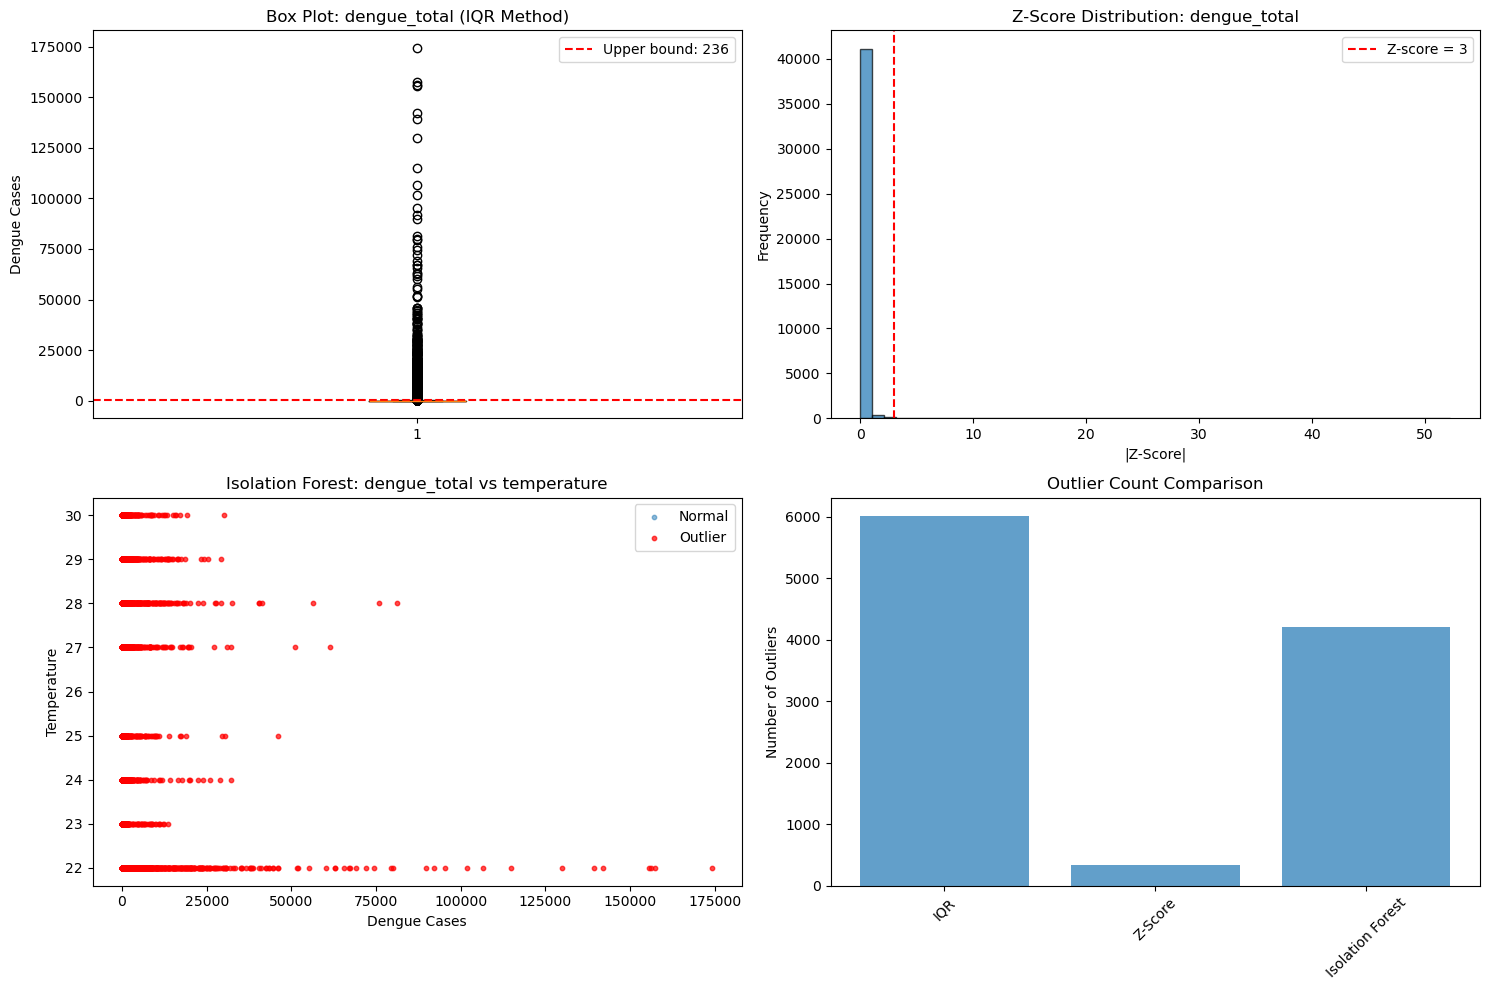

In [46]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# IQR outliers for target
col = 'dengue_total'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

axes[0, 0].boxplot(df[col], vert=True)
axes[0, 0].axhline(upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.0f}')
axes[0, 0].set_title('Box Plot: dengue_total (IQR Method)')
axes[0, 0].set_ylabel('Dengue Cases')
axes[0, 0].legend()

# Z-score outliers
z_scores = np.abs(stats.zscore(df[col]))
axes[0, 1].hist(z_scores, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(3, color='r', linestyle='--', label='Z-score = 3')
axes[0, 1].set_title('Z-Score Distribution: dengue_total')
axes[0, 1].set_xlabel('|Z-Score|')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Isolation Forest results
axes[1, 0].scatter(df[~outlier_mask]['dengue_total'], 
                   df[~outlier_mask]['temperature'], 
                   alpha=0.5, label='Normal', s=10)
axes[1, 0].scatter(df[outlier_mask]['dengue_total'], 
                   df[outlier_mask]['temperature'], 
                   alpha=0.7, label='Outlier', s=10, color='red')
axes[1, 0].set_title('Isolation Forest: dengue_total vs temperature')
axes[1, 0].set_xlabel('Dengue Cases')
axes[1, 0].set_ylabel('Temperature')
axes[1, 0].legend()

# Outlier comparison
outlier_counts = {
    'IQR': len(target_outliers_iqr),
    'Z-Score': len(target_outliers_z),
    'Isolation Forest': outlier_mask.sum()
}
axes[1, 1].bar(outlier_counts.keys(), outlier_counts.values(), alpha=0.7)
axes[1, 1].set_title('Outlier Count Comparison')
axes[1, 1].set_ylabel('Number of Outliers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [47]:
# Outlier Handling Strategies
print("=" * 60)
print("OUTLIER HANDLING STRATEGIES")
print("=" * 60)

# Create copies for different handling strategies
df_original = df.copy()
df_winsorized = df.copy()
df_log_transformed = df.copy()
df_removed = df.copy()

# Strategy 1: Winsorization (Capping at 1st and 99th percentiles)
print("\n1. WINSORIZATION (Capping at 1st and 99th percentiles)")
print("-" * 60)
for col in numeric_cols[:10]:
    if col in df_winsorized.columns:
        lower_percentile = df_winsorized[col].quantile(0.01)
        upper_percentile = df_winsorized[col].quantile(0.99)
        df_winsorized[col] = df_winsorized[col].clip(lower=lower_percentile, upper=upper_percentile)

col = 'dengue_total'
lower_percentile = df_winsorized[col].quantile(0.01)
upper_percentile = df_winsorized[col].quantile(0.99)
df_winsorized[col] = df_winsorized[col].clip(lower=lower_percentile, upper=upper_percentile)
print(f"  Capped {col} between {lower_percentile:.2f} and {upper_percentile:.2f}")

# Strategy 2: Log Transformation
print("\n2. LOG TRANSFORMATION")
print("-" * 60)
for col in ['dengue_total', 'cases_lag_7d', 'cases_rolling_mean_7d', 'rainfall']:
    if col in df_log_transformed.columns:
        df_log_transformed[f'{col}_log'] = np.log1p(df_log_transformed[col])
        print(f"  Created {col}_log")

# Strategy 3: Remove extreme outliers (only Isolation Forest outliers)
print("\n3. REMOVAL (Isolation Forest outliers only)")
print("-" * 60)
df_removed = df_removed[~df_removed['is_outlier_if']].copy()
print(f"  Removed {outlier_mask.sum()} rows ({outlier_mask.sum()/len(df)*100:.2f}%)")

print("\n" + "=" * 60)
print("DATASET SIZES AFTER HANDLING")
print("=" * 60)
print(f"Original:        {len(df_original):,} rows")
print(f"Winsorized:      {len(df_winsorized):,} rows")
print(f"Log Transformed: {len(df_log_transformed):,} rows")
print(f"Outliers Removed: {len(df_removed):,} rows")

# Use winsorized dataset for further analysis (preserves all data points)
df = df_winsorized.copy()
print(f"\n✓ Using winsorized dataset for model training")


OUTLIER HANDLING STRATEGIES

1. WINSORIZATION (Capping at 1st and 99th percentiles)
------------------------------------------------------------
  Capped dengue_total between 0.00 and 8578.01

2. LOG TRANSFORMATION
------------------------------------------------------------
  Created dengue_total_log
  Created cases_lag_7d_log
  Created cases_rolling_mean_7d_log
  Created rainfall_log

3. REMOVAL (Isolation Forest outliers only)
------------------------------------------------------------
  Removed 4200 rows (10.00%)

DATASET SIZES AFTER HANDLING
Original:        41,997 rows
Winsorized:      41,997 rows
Log Transformed: 41,997 rows
Outliers Removed: 37,797 rows

✓ Using winsorized dataset for model training


## Phase 3: Data Preprocessing


In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

print("=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Separate features and target
target_col = 'dengue_total'
feature_cols = [col for col in df.columns if col not in [
    'ISO_A0', 'calendar_start_date', target_col, 'region', 'is_outlier_if'
]]

# Identify categorical and numeric features
categorical_cols = ['ISO_A0', 'region']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

print(f"\nTarget variable: {target_col}")
print(f"Total features: {len(feature_cols)}")
print(f"  - Numeric features: {len(numeric_cols)}")
print(f"  - Categorical features: {len(categorical_cols)}")

# Encode categorical variables
print("\n1. Encoding Categorical Variables")
print("-" * 60)
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"  Encoded {col}: {df[col].nunique()} unique values")

# Update feature columns to include encoded categoricals
feature_cols = numeric_cols + [f'{col}_encoded' for col in categorical_cols if col in df.columns]

# Prepare X and y
X = df[feature_cols].fillna(0)
y = df[target_col].values

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


DATA PREPROCESSING

Target variable: dengue_total
Total features: 50
  - Numeric features: 50
  - Categorical features: 2

1. Encoding Categorical Variables
------------------------------------------------------------
  Encoded ISO_A0: 10 unique values
  Encoded region: 1 unique values

Final feature matrix shape: (41997, 52)
Target vector shape: (41997,)


In [49]:
# Time-series aware data splitting
print("\n2. Time-Series Aware Data Splitting")
print("-" * 60)

# Sort by date to maintain temporal order
df_sorted = df.sort_values('calendar_start_date').reset_index(drop=True)
X_sorted = df_sorted[feature_cols].fillna(0)
y_sorted = df_sorted[target_col].values

# Split: 70% train, 15% validation, 15% test
train_size = 0.70
val_size = 0.15
test_size = 0.15

n_total = len(X_sorted)
n_train = int(n_total * train_size)
n_val = int(n_total * val_size)

X_train = X_sorted[:n_train]
y_train = y_sorted[:n_train]
X_val = X_sorted[n_train:n_train+n_val]
y_val = y_sorted[n_train:n_train+n_val]
X_test = X_sorted[n_train+n_val:]
y_test = y_sorted[n_train+n_val:]

print(f"Train set:   {len(X_train):,} samples ({len(X_train)/n_total*100:.1f}%)")
print(f"Val set:     {len(X_val):,} samples ({len(X_val)/n_total*100:.1f}%)")
print(f"Test set:    {len(X_test):,} samples ({len(X_test)/n_total*100:.1f}%)")
print(f"\nTrain date range: {df_sorted.iloc[0]['calendar_start_date']} to {df_sorted.iloc[n_train-1]['calendar_start_date']}")
print(f"Val date range:   {df_sorted.iloc[n_train]['calendar_start_date']} to {df_sorted.iloc[n_train+n_val-1]['calendar_start_date']}")
print(f"Test date range:  {df_sorted.iloc[n_train+n_val]['calendar_start_date']} to {df_sorted.iloc[-1]['calendar_start_date']}")



2. Time-Series Aware Data Splitting
------------------------------------------------------------
Train set:   29,397 samples (70.0%)
Val set:     6,299 samples (15.0%)
Test set:    6,301 samples (15.0%)

Train date range: 1958-01-01 00:00:00 to 2017-02-01 00:00:00
Val date range:   2017-02-01 00:00:00 to 2021-04-01 00:00:00
Test date range:  2021-04-01 00:00:00 to 2025-03-01 00:00:00


In [50]:
# Check for infinite values and handle them
print("\n3. Checking for Infinite/Extreme Values")
print("-" * 60)

# Check for infinite values in DataFrames
inf_count_train = np.isinf(X_train.select_dtypes(include=[np.number])).sum().sum()
inf_count_val = np.isinf(X_val.select_dtypes(include=[np.number])).sum().sum()
inf_count_test = np.isinf(X_test.select_dtypes(include=[np.number])).sum().sum()

if inf_count_train > 0 or inf_count_val > 0 or inf_count_test > 0:
    print(f"⚠ Found infinite values: Train={inf_count_train}, Val={inf_count_val}, Test={inf_count_test}")
    print("  Handling them...")
    # Replace infinite values with NaN first, then fill with 0
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_val = X_val.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    X_test = X_test.fillna(0)
    print("✓ Replaced infinite values with 0")
else:
    print("✓ No infinite values found")

# Check for very large values that might cause issues
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    max_abs_train = X_train[numeric_cols].abs().max().max()
    max_abs_val = X_val[numeric_cols].abs().max().max()
    max_abs_test = X_test[numeric_cols].abs().max().max()
    
    if max_abs_train > 1e10 or max_abs_val > 1e10 or max_abs_test > 1e10:
        print(f"⚠ Found very large values (max: {max(max_abs_train, max_abs_val, max_abs_test):.2e}). Capping...")
        # Cap extreme values at 99.9th percentile for each column
        for col in numeric_cols:
            upper_limit = X_train[col].quantile(0.999)
            lower_limit = X_train[col].quantile(0.001)
            if not np.isnan(upper_limit) and not np.isnan(lower_limit):
                X_train[col] = X_train[col].clip(lower=lower_limit, upper=upper_limit)
                X_val[col] = X_val[col].clip(lower=lower_limit, upper=upper_limit)
                X_test[col] = X_test[col].clip(lower=lower_limit, upper=upper_limit)
        print("✓ Capped extreme values")
    else:
        print("✓ No extreme values found")

# Convert to numpy arrays for scaling
X_train = X_train.values.astype(np.float64)
X_val = X_val.values.astype(np.float64)
X_test = X_test.values.astype(np.float64)

# Feature Scaling
print("\n4. Feature Scaling (StandardScaler)")
print("-" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0)[:5]}")

# Verify no infinite values after scaling
if np.isinf(X_train_scaled).any() or np.isinf(X_val_scaled).any() or np.isinf(X_test_scaled).any():
    print("⚠ Warning: Still found infinite values after scaling!")
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    X_val_scaled = np.nan_to_num(X_val_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    print("✓ Cleaned infinite values after scaling")

# Store for later use
X_train_final = X_train_scaled
X_val_final = X_val_scaled
X_test_final = X_test_scaled

print("\n✓ Preprocessing complete!")



3. Checking for Infinite/Extreme Values
------------------------------------------------------------
⚠ Found infinite values: Train=869, Val=100, Test=451
  Handling them...
✓ Replaced infinite values with 0
✓ No extreme values found

4. Feature Scaling (StandardScaler)
------------------------------------------------------------
Scaled training features shape: (29397, 52)
Mean of scaled features (should be ~0): [ 8.53898485e-15 -3.09383509e-17 -7.05781130e-17  9.76491701e-17
 -7.34785834e-17]
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]

✓ Preprocessing complete!


## Phase 4: Model Training - Traditional ML


In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("BASELINE MODELS TRAINING")
print("=" * 60)

# Dictionary to store models and results
models = {}
results = {}

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1))) * 100  # +1 to avoid division by zero
    r2 = r2_score(y_true, y_pred)
    median_ae = np.median(np.abs(y_true - y_pred))
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2,
        'Median_AE': median_ae
    }


BASELINE MODELS TRAINING


In [52]:
# Model 1: Linear Regression
print("\n1. Linear Regression")
print("-" * 60)
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
y_train_pred_lr = lr_model.predict(X_train_final)
y_val_pred_lr = lr_model.predict(X_val_final)

models['Linear Regression'] = lr_model
results['Linear Regression'] = {
    'train': calculate_metrics(y_train, y_train_pred_lr, 'Linear Regression'),
    'val': calculate_metrics(y_val, y_val_pred_lr, 'Linear Regression')
}

print(f"Train - MAE: {results['Linear Regression']['train']['MAE']:.2f}, RMSE: {results['Linear Regression']['train']['RMSE']:.2f}, R²: {results['Linear Regression']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Linear Regression']['val']['MAE']:.2f}, RMSE: {results['Linear Regression']['val']['RMSE']:.2f}, R²: {results['Linear Regression']['val']['R2']:.4f}")



1. Linear Regression
------------------------------------------------------------
Train - MAE: 134.00, RMSE: 440.68, R²: 0.8006
Val   - MAE: 229.96, RMSE: 768.37, R²: 0.6263


In [53]:
# Model 2: Ridge Regression
print("\n2. Ridge Regression")
print("-" * 60)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_final, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_final)
y_val_pred_ridge = ridge_model.predict(X_val_final)

models['Ridge Regression'] = ridge_model
results['Ridge Regression'] = {
    'train': calculate_metrics(y_train, y_train_pred_ridge, 'Ridge Regression'),
    'val': calculate_metrics(y_val, y_val_pred_ridge, 'Ridge Regression')
}

print(f"Train - MAE: {results['Ridge Regression']['train']['MAE']:.2f}, RMSE: {results['Ridge Regression']['train']['RMSE']:.2f}, R²: {results['Ridge Regression']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Ridge Regression']['val']['MAE']:.2f}, RMSE: {results['Ridge Regression']['val']['RMSE']:.2f}, R²: {results['Ridge Regression']['val']['R2']:.4f}")



2. Ridge Regression
------------------------------------------------------------
Train - MAE: 133.83, RMSE: 440.68, R²: 0.8006
Val   - MAE: 229.55, RMSE: 767.48, R²: 0.6272


In [54]:
# Model 3: Random Forest
print("\n3. Random Forest")
print("-" * 60)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(X_train_final, y_train)
y_train_pred_rf = rf_model.predict(X_train_final)
y_val_pred_rf = rf_model.predict(X_val_final)

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'train': calculate_metrics(y_train, y_train_pred_rf, 'Random Forest'),
    'val': calculate_metrics(y_val, y_val_pred_rf, 'Random Forest')
}

print(f"Train - MAE: {results['Random Forest']['train']['MAE']:.2f}, RMSE: {results['Random Forest']['train']['RMSE']:.2f}, R²: {results['Random Forest']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Random Forest']['val']['MAE']:.2f}, RMSE: {results['Random Forest']['val']['RMSE']:.2f}, R²: {results['Random Forest']['val']['R2']:.4f}")



3. Random Forest
------------------------------------------------------------
Train - MAE: 2.86, RMSE: 25.16, R²: 0.9994
Val   - MAE: 47.27, RMSE: 264.71, R²: 0.9556


In [55]:
# Model 4: XGBoost
print("\n4. XGBoost")
print("-" * 60)
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
xgb_model.fit(X_train_final, y_train)
y_train_pred_xgb = xgb_model.predict(X_train_final)
y_val_pred_xgb = xgb_model.predict(X_val_final)

models['XGBoost'] = xgb_model
results['XGBoost'] = {
    'train': calculate_metrics(y_train, y_train_pred_xgb, 'XGBoost'),
    'val': calculate_metrics(y_val, y_val_pred_xgb, 'XGBoost')
}

print(f"Train - MAE: {results['XGBoost']['train']['MAE']:.2f}, RMSE: {results['XGBoost']['train']['RMSE']:.2f}, R²: {results['XGBoost']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['XGBoost']['val']['MAE']:.2f}, RMSE: {results['XGBoost']['val']['RMSE']:.2f}, R²: {results['XGBoost']['val']['R2']:.4f}")



4. XGBoost
------------------------------------------------------------
Train - MAE: 4.87, RMSE: 15.11, R²: 0.9998
Val   - MAE: 53.89, RMSE: 276.29, R²: 0.9517


In [56]:
# Summary of baseline models
print("\n" + "=" * 60)
print("BASELINE MODELS SUMMARY (Validation Set)")
print("=" * 60)
print(f"{'Model':<20} {'MAE':<12} {'RMSE':<12} {'MAPE':<12} {'R²':<10}")
print("-" * 60)
for model_name in results.keys():
    val_metrics = results[model_name]['val']
    print(f"{model_name:<20} {val_metrics['MAE']:<12.2f} {val_metrics['RMSE']:<12.2f} {val_metrics['MAPE']:<12.2f} {val_metrics['R2']:<10.4f}")

# Find best baseline model
best_baseline = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
print(f"\n✓ Best baseline model (lowest MAE): {best_baseline}")
print(f"  Validation MAE: {results[best_baseline]['val']['MAE']:.2f}")
print(f"  Validation RMSE: {results[best_baseline]['val']['RMSE']:.2f}")
print(f"  Validation R²: {results[best_baseline]['val']['R2']:.4f}")



BASELINE MODELS SUMMARY (Validation Set)
Model                MAE          RMSE         MAPE         R²        
------------------------------------------------------------
Linear Regression    229.96       768.37       677.15       0.6263    
Ridge Regression     229.55       767.48       674.16       0.6272    
Random Forest        47.27        264.71       3.83         0.9556    
XGBoost              53.89        276.29       16.62        0.9517    

✓ Best baseline model (lowest MAE): Random Forest
  Validation MAE: 47.27
  Validation RMSE: 264.71
  Validation R²: 0.9556


## Phase 5: Pretrained Models & Transfer Learning


In [57]:
# Try to import Prophet (Facebook's time-series forecasting)
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except ImportError:
    PROPHET_AVAILABLE = False
    print("Prophet not available. Install with: pip install prophet")

# Try to import AutoARIMA
try:
    from pmdarima import auto_arima
    AUTO_ARIMA_AVAILABLE = True
except ImportError:
    AUTO_ARIMA_AVAILABLE = False
    print("pmdarima not available. Install with: pip install pmdarima")

print("=" * 60)
print("PRETRAINED TIME-SERIES MODELS")
print("=" * 60)


Prophet not available. Install with: pip install prophet
pmdarima not available. Install with: pip install pmdarima
PRETRAINED TIME-SERIES MODELS


In [58]:
# Prepare data for time-series models (aggregate by date)
print("\n1. Preparing Time-Series Data")
print("-" * 60)

# Aggregate by date for Prophet/AutoARIMA
ts_data = df_sorted.groupby('calendar_start_date')['dengue_total'].sum().reset_index()
ts_data.columns = ['ds', 'y']  # Prophet expects 'ds' and 'y'
ts_data = ts_data.sort_values('ds').reset_index(drop=True)

# Split time-series data
n_ts_total = len(ts_data)
n_ts_train = int(n_ts_total * train_size)
n_ts_val = int(n_ts_total * val_size)

ts_train = ts_data[:n_ts_train].copy()
ts_val = ts_data[n_ts_train:n_ts_train+n_ts_val].copy()
ts_test = ts_data[n_ts_train+n_ts_val:].copy()

print(f"Time-series train: {len(ts_train):,} dates")
print(f"Time-series val:   {len(ts_val):,} dates")
print(f"Time-series test:  {len(ts_test):,} dates")



1. Preparing Time-Series Data
------------------------------------------------------------
Time-series train: 729 dates
Time-series val:   156 dates
Time-series test:  157 dates


In [59]:
# Model 5: Prophet (if available)
if PROPHET_AVAILABLE:
    print("\n2. Prophet Model")
    print("-" * 60)
    try:
        prophet_model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative'
        )
        prophet_model.fit(ts_train)
        
        # Make predictions
        future_train = prophet_model.make_future_dataframe(periods=0)
        forecast_train = prophet_model.predict(future_train)
        y_train_pred_prophet = forecast_train['yhat'].values[:len(ts_train)]
        
        future_val = prophet_model.make_future_dataframe(periods=len(ts_val))
        forecast_val = prophet_model.predict(future_val)
        y_val_pred_prophet = forecast_val['yhat'].values[-len(ts_val):]
        
        # Align with validation set (aggregate predictions)
        # Since we aggregated by date, we need to map back
        # For simplicity, use the aggregated predictions
        y_val_prophet_aligned = np.repeat(y_val_pred_prophet, len(y_val) // len(y_val_pred_prophet) + 1)[:len(y_val)]
        y_train_prophet_aligned = np.repeat(y_train_pred_prophet, len(y_train) // len(y_train_pred_prophet) + 1)[:len(y_train)]
        
        models['Prophet'] = prophet_model
        results['Prophet'] = {
            'train': calculate_metrics(y_train, y_train_prophet_aligned, 'Prophet'),
            'val': calculate_metrics(y_val, y_val_prophet_aligned, 'Prophet')
        }
        
        print(f"Train - MAE: {results['Prophet']['train']['MAE']:.2f}, RMSE: {results['Prophet']['train']['RMSE']:.2f}, R²: {results['Prophet']['train']['R2']:.4f}")
        print(f"Val   - MAE: {results['Prophet']['val']['MAE']:.2f}, RMSE: {results['Prophet']['val']['RMSE']:.2f}, R²: {results['Prophet']['val']['R2']:.4f}")
    except Exception as e:
        print(f"Error training Prophet: {e}")
        PROPHET_AVAILABLE = False
else:
    print("\n2. Prophet Model - Skipped (not available)")



2. Prophet Model - Skipped (not available)


In [60]:
# Model 6: AutoARIMA (if available)
if AUTO_ARIMA_AVAILABLE:
    print("\n3. AutoARIMA Model")
    print("-" * 60)
    try:
        # Train on aggregated time series
        auto_arima_model = auto_arima(
            ts_train['y'],
            seasonal=True,
            m=12,  # Monthly seasonality
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_order=5
        )
        
        # Make predictions
        y_train_pred_arima = auto_arima_model.predict_in_sample()
        y_val_pred_arima = auto_arima_model.predict(n_periods=len(ts_val))
        
        # Align with validation set
        y_val_arima_aligned = np.repeat(y_val_pred_arima, len(y_val) // len(y_val_pred_arima) + 1)[:len(y_val)]
        y_train_arima_aligned = np.repeat(y_train_pred_arima, len(y_train) // len(y_train_pred_arima) + 1)[:len(y_train)]
        
        models['AutoARIMA'] = auto_arima_model
        results['AutoARIMA'] = {
            'train': calculate_metrics(y_train, y_train_arima_aligned, 'AutoARIMA'),
            'val': calculate_metrics(y_val, y_val_arima_aligned, 'AutoARIMA')
        }
        
        print(f"Train - MAE: {results['AutoARIMA']['train']['MAE']:.2f}, RMSE: {results['AutoARIMA']['train']['RMSE']:.2f}, R²: {results['AutoARIMA']['train']['R2']:.4f}")
        print(f"Val   - MAE: {results['AutoARIMA']['val']['MAE']:.2f}, RMSE: {results['AutoARIMA']['val']['RMSE']:.2f}, R²: {results['AutoARIMA']['val']['R2']:.4f}")
        print(f"ARIMA Order: {auto_arima_model.order}")
        print(f"Seasonal Order: {auto_arima_model.seasonal_order}")
    except Exception as e:
        print(f"Error training AutoARIMA: {e}")
        AUTO_ARIMA_AVAILABLE = False
else:
    print("\n3. AutoARIMA Model - Skipped (not available)")



3. AutoARIMA Model - Skipped (not available)


In [61]:
# Model 7: LSTM (Deep Learning)
print("\n4. LSTM Model")
print("-" * 60)

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    
    # Prepare sequences for LSTM
    def create_sequences(X, y, seq_length=7):
        X_seq, y_seq = [], []
        for i in range(len(X) - seq_length):
            X_seq.append(X[i:i+seq_length])
            y_seq.append(y[i+seq_length])
        return np.array(X_seq), np.array(y_seq)
    
    seq_length = 7
    X_train_seq, y_train_seq = create_sequences(X_train_final, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val_final, y_val, seq_length)
    
    print(f"LSTM sequences - Train: {X_train_seq.shape}, Val: {X_val_seq.shape}")
    
    # Build LSTM model
    lstm_model = keras.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(seq_length, X_train_final.shape[1])),
        layers.Dropout(0.2),
        layers.LSTM(32, return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    
    lstm_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Train with early stopping
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]
    
    history = lstm_model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=50,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    
    # Predictions (need to handle sequence requirement)
    # For validation, use last sequence
    y_train_pred_lstm = lstm_model.predict(X_train_seq, verbose=0).flatten()
    y_val_pred_lstm = lstm_model.predict(X_val_seq, verbose=0).flatten()
    
    # Align predictions (LSTM predictions are shorter due to sequence requirement)
    # Pad with first prediction for alignment
    y_train_lstm_aligned = np.concatenate([np.repeat(y_train_pred_lstm[0], seq_length), y_train_pred_lstm])[:len(y_train)]
    y_val_lstm_aligned = np.concatenate([np.repeat(y_val_pred_lstm[0], seq_length), y_val_pred_lstm])[:len(y_val)]
    
    models['LSTM'] = lstm_model
    results['LSTM'] = {
        'train': calculate_metrics(y_train, y_train_lstm_aligned, 'LSTM'),
        'val': calculate_metrics(y_val, y_val_lstm_aligned, 'LSTM')
    }
    
    print(f"Train - MAE: {results['LSTM']['train']['MAE']:.2f}, RMSE: {results['LSTM']['train']['RMSE']:.2f}, R²: {results['LSTM']['train']['R2']:.4f}")
    print(f"Val   - MAE: {results['LSTM']['val']['MAE']:.2f}, RMSE: {results['LSTM']['val']['RMSE']:.2f}, R²: {results['LSTM']['val']['R2']:.4f}")
    
except ImportError:
    print("TensorFlow/Keras not available. Install with: pip install tensorflow")
except Exception as e:
    print(f"Error training LSTM: {e}")
    import traceback
    traceback.print_exc()



4. LSTM Model
------------------------------------------------------------


2025-11-30 23:11:20.813177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 23:11:21.614654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-30 23:11:23.049741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


LSTM sequences - Train: (29390, 7, 52), Val: (6292, 7, 52)
Epoch 1/50


2025-11-30 23:11:23.719168: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 984755.8125 - mae: 254.9939 - val_loss: 1578983.2500 - val_mae: 450.3273 - learning_rate: 0.0010
Epoch 2/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 905543.2500 - mae: 276.2046 - val_loss: 1484761.8750 - val_mae: 458.0407 - learning_rate: 0.0010
Epoch 3/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 858977.8125 - mae: 280.0993 - val_loss: 1444322.2500 - val_mae: 441.0813 - learning_rate: 0.0010
Epoch 4/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 833776.0000 - mae: 281.4009 - val_loss: 1423844.1250 - val_mae: 455.9904 - learning_rate: 0.0010
Epoch 5/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 822058.8125 - mae: 285.7361 - val_loss: 1412566.1250 - val_mae: 455.0636 - learning_rate: 0.0010
Epoch 6/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 806129.7500 - mae: 284.0859 - val_loss: 1415548.3750 - val_mae: 445.4842 - learning_rate: 0.0010
Epoch 7/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 796611.75

## Phase 6: Model Evaluation


In [64]:
print("=" * 60)
print("COMPREHENSIVE MODEL EVALUATION")
print("=" * 60)

# Calculate additional time-series metrics
def calculate_ts_metrics(y_true, y_pred):
    # Ensure both arrays have the same length
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    min_len = min(len(y_true), len(y_pred))
    if min_len == 0:
        return {
            'Directional_Accuracy': 0,
            'Bias': 0,
            'MASE': np.nan
        }
    
    # Truncate to same length
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]
    
    # Directional accuracy
    if len(y_true) > 1 and len(y_pred) > 1:
        true_direction = np.diff(y_true) > 0
        pred_direction = np.diff(y_pred) > 0
        directional_accuracy = np.mean(true_direction == pred_direction) * 100
    else:
        directional_accuracy = 0
    
    # Forecast bias
    bias = np.mean(y_pred - y_true)
    
    # MASE (Mean Absolute Scaled Error) - using naive forecast as baseline
    if len(y_true) > 1:
        naive_forecast = np.abs(np.diff(y_true))
        mae = np.mean(np.abs(y_true - y_pred))
        mase = mae / (np.mean(naive_forecast) + 1e-10)
    else:
        mase = np.nan
    
    return {
        'Directional_Accuracy': directional_accuracy,
        'Bias': bias,
        'MASE': mase
    }

# Evaluate all models on validation set
print("\nDetailed Validation Metrics:")
print("=" * 80)
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'MAPE':<10} {'R²':<10} {'Dir_Acc':<10} {'Bias':<10}")
print("-" * 80)

for model_name in results.keys():
    val_metrics = results[model_name]['val']
    ts_metrics = calculate_ts_metrics(y_val, 
                                       models[model_name].predict(X_val_final) if model_name not in ['Prophet', 'AutoARIMA', 'LSTM'] 
                                       else (y_val_pred_prophet if model_name == 'Prophet' 
                                            else (y_val_pred_arima if model_name == 'AutoARIMA' 
                                                 else y_val_pred_lstm)))
    
    print(f"{model_name:<20} {val_metrics['MAE']:<10.2f} {val_metrics['RMSE']:<10.2f} "
          f"{val_metrics['MAPE']:<10.2f} {val_metrics['R2']:<10.4f} "
          f"{ts_metrics['Directional_Accuracy']:<10.2f} {ts_metrics['Bias']:<10.2f}")


COMPREHENSIVE MODEL EVALUATION

Detailed Validation Metrics:
Model                MAE        RMSE       MAPE       R²         Dir_Acc    Bias      
--------------------------------------------------------------------------------
Linear Regression    229.96     768.37     677.15     0.6263     82.26      -18.48    
Ridge Regression     229.55     767.48     674.16     0.6272     82.23      -17.93    
Random Forest        47.27      264.71     3.83       0.9556     99.27      30.58     
XGBoost              53.89      276.29     16.62      0.9517     98.08      29.55     
LSTM                 452.79     1182.08    1784.56    0.1156     49.63      -51.35    


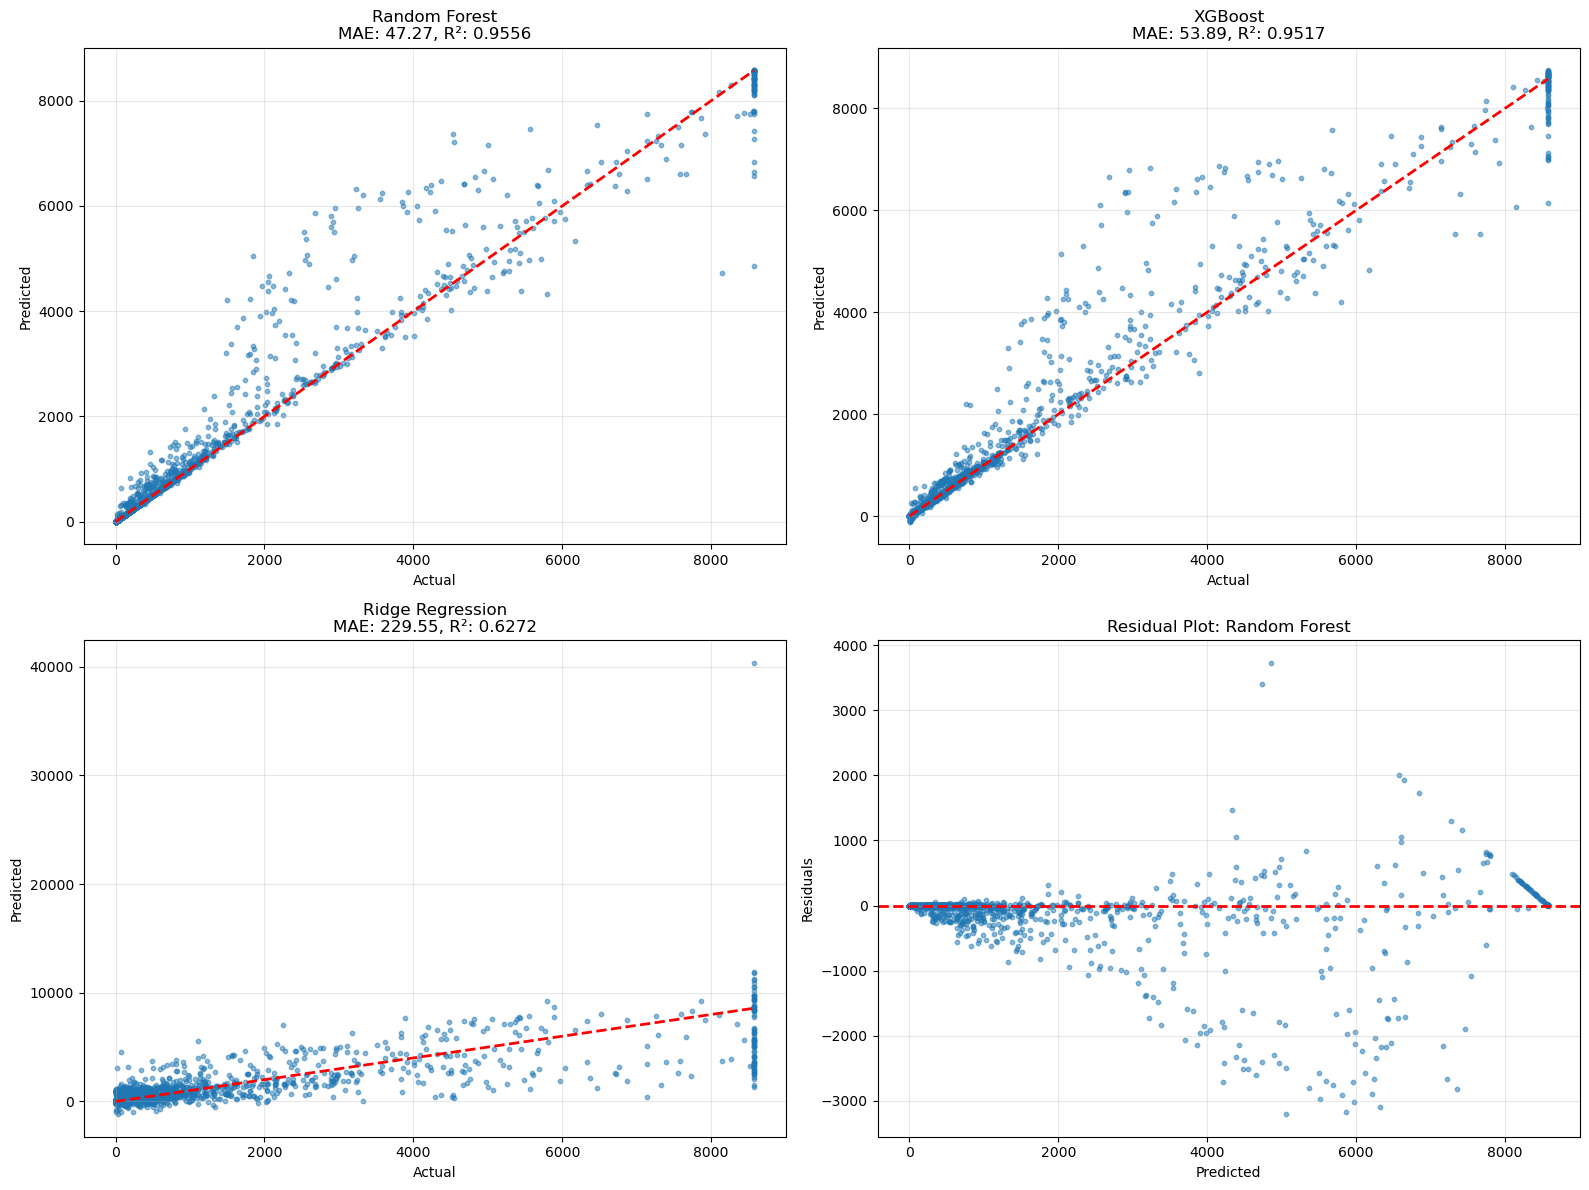

In [65]:
# Visualize predictions vs actual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Get predictions for top 3 models
top_models = sorted(results.keys(), key=lambda x: results[x]['val']['MAE'])[:3]

for idx, model_name in enumerate(top_models):
    row = idx // 2
    col = idx % 2
    
    if model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
        if model_name == 'Prophet':
            y_pred = y_val_prophet_aligned
        elif model_name == 'AutoARIMA':
            y_pred = y_val_arima_aligned
        else:
            y_pred = y_val_lstm_aligned
    else:
        y_pred = models[model_name].predict(X_val_final)
    
    # Scatter plot
    axes[row, col].scatter(y_val, y_pred, alpha=0.5, s=10)
    axes[row, col].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    axes[row, col].set_xlabel('Actual')
    axes[row, col].set_ylabel('Predicted')
    axes[row, col].set_title(f'{model_name}\nMAE: {results[model_name]["val"]["MAE"]:.2f}, R²: {results[model_name]["val"]["R2"]:.4f}')
    axes[row, col].grid(True, alpha=0.3)

# Residual plot for best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
if best_model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
    if best_model_name == 'Prophet':
        y_pred_best = y_val_prophet_aligned
    elif best_model_name == 'AutoARIMA':
        y_pred_best = y_val_arima_aligned
    else:
        y_pred_best = y_val_lstm_aligned
else:
    y_pred_best = models[best_model_name].predict(X_val_final)

residuals = y_val - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.5, s=10)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residual Plot: {best_model_name}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



FEATURE IMPORTANCE (Tree-based Models)

Random Forest:
------------------------------------------------------------
Top 10 Features:
   1. historical_monthly_max        : 0.2865
   2. historical_monthly_avg        : 0.2840
   3. cases_to_historical_monthly_avg: 0.1372
   4. cases_acceleration            : 0.0965
   5. cases_per_day                 : 0.0664
   6. cases_lag_1d                  : 0.0567
   7. cases_wow_abs_change          : 0.0369
   8. country_total_cases           : 0.0079
   9. cases_rolling_mean_7d         : 0.0059
  10. cases_rolling_mean_30d        : 0.0045


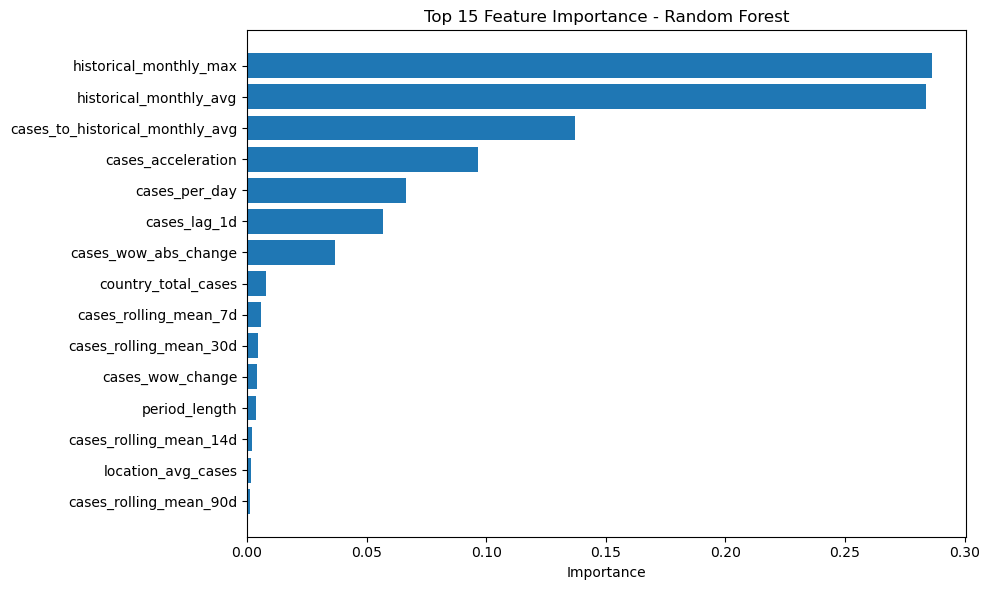


XGBoost:
------------------------------------------------------------
Top 10 Features:
   1. historical_monthly_max        : 0.5462
   2. historical_monthly_avg        : 0.1146
   3. cases_rolling_mean_30d        : 0.0777
   4. cases_to_historical_monthly_avg: 0.0755
   5. cases_acceleration            : 0.0749
   6. cases_lag_1d                  : 0.0311
   7. cases_wow_abs_change          : 0.0231
   8. cases_per_day                 : 0.0168
   9. cases_rolling_mean_7d         : 0.0080
  10. cases_wow_change              : 0.0062


In [66]:
# Feature importance for tree-based models
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE (Tree-based Models)")
print("=" * 60)

tree_models = ['Random Forest', 'XGBoost']
for model_name in tree_models:
    if model_name in models:
        print(f"\n{model_name}:")
        print("-" * 60)
        
        if model_name == 'Random Forest':
            importances = models[model_name].feature_importances_
        else:  # XGBoost
            importances = models[model_name].feature_importances_
        
        # Get top 10 features
        feature_importance = list(zip(feature_cols, importances))
        feature_importance.sort(key=lambda x: x[1], reverse=True)
        
        print("Top 10 Features:")
        for i, (feature, importance) in enumerate(feature_importance[:10], 1):
            print(f"  {i:2d}. {feature:30s}: {importance:.4f}")
        
        # Visualize
        if model_name == 'Random Forest':  # Show for one model
            fig, ax = plt.subplots(figsize=(10, 6))
            top_features = [f[0] for f in feature_importance[:15]]
            top_importances = [f[1] for f in feature_importance[:15]]
            ax.barh(range(len(top_features)), top_importances)
            ax.set_yticks(range(len(top_features)))
            ax.set_yticklabels(top_features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Top 15 Feature Importance - {model_name}')
            ax.invert_yaxis()
            plt.tight_layout()
            plt.show()



MODEL COMPARISON CHART


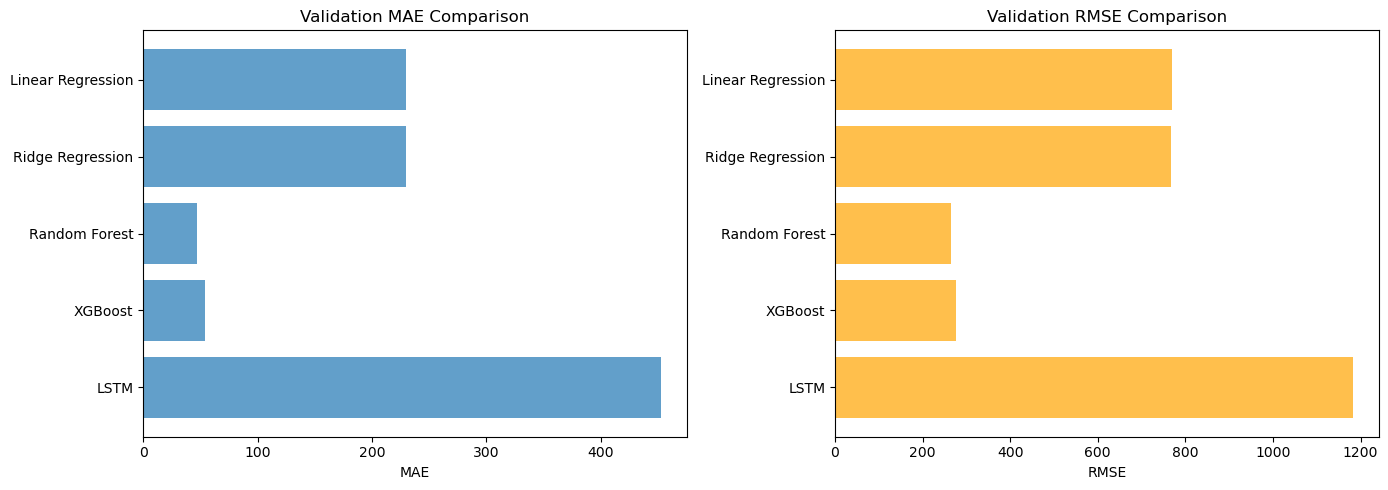


✓ Best Model: Random Forest
  Validation MAE: 47.27
  Validation RMSE: 264.71
  Validation R²: 0.9556
  Validation MAPE: 3.83%


In [67]:
# Model comparison chart
print("\n" + "=" * 60)
print("MODEL COMPARISON CHART")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MAE comparison
model_names = list(results.keys())
mae_values = [results[m]['val']['MAE'] for m in model_names]
rmse_values = [results[m]['val']['RMSE'] for m in model_names]

axes[0].barh(model_names, mae_values, alpha=0.7)
axes[0].set_xlabel('MAE')
axes[0].set_title('Validation MAE Comparison')
axes[0].invert_yaxis()

axes[1].barh(model_names, rmse_values, alpha=0.7, color='orange')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Validation RMSE Comparison')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Find best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
print(f"\n✓ Best Model: {best_model_name}")
print(f"  Validation MAE: {results[best_model_name]['val']['MAE']:.2f}")
print(f"  Validation RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"  Validation R²: {results[best_model_name]['val']['R2']:.4f}")
print(f"  Validation MAPE: {results[best_model_name]['val']['MAPE']:.2f}%")


## Phase 7: Model Selection & Finalization


In [68]:
print("=" * 60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("=" * 60)

# Select best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
best_model = models[best_model_name]

print(f"\nSelected Model: {best_model_name}")
print(f"Validation Performance:")
print(f"  MAE: {results[best_model_name]['val']['MAE']:.2f}")
print(f"  RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"  R²: {results[best_model_name]['val']['R2']:.4f}")

# Evaluate on test set
print("\n" + "-" * 60)
print("Test Set Evaluation:")
print("-" * 60)

if best_model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
    # Handle time-series models differently
    if best_model_name == 'Prophet':
        future_test = prophet_model.make_future_dataframe(periods=len(ts_test))
        forecast_test = prophet_model.predict(future_test)
        y_test_pred = forecast_test['yhat'].values[-len(ts_test):]
        y_test_pred_aligned = np.repeat(y_test_pred, len(y_test) // len(y_test_pred) + 1)[:len(y_test)]
    elif best_model_name == 'AutoARIMA':
        y_test_pred = auto_arima_model.predict(n_periods=len(ts_test))
        y_test_pred_aligned = np.repeat(y_test_pred, len(y_test) // len(y_test_pred) + 1)[:len(y_test)]
    else:  # LSTM
        X_test_seq, y_test_seq = create_sequences(X_test_final, y_test, seq_length)
        y_test_pred = lstm_model.predict(X_test_seq, verbose=0).flatten()
        y_test_pred_aligned = np.concatenate([np.repeat(y_test_pred[0], seq_length), y_test_pred])[:len(y_test)]
else:
    y_test_pred_aligned = best_model.predict(X_test_final)

test_metrics = calculate_metrics(y_test, y_test_pred_aligned, best_model_name)
test_ts_metrics = calculate_ts_metrics(y_test, y_test_pred_aligned)

print(f"MAE:  {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")
print(f"R²:   {test_metrics['R2']:.4f}")
print(f"Median AE: {test_metrics['Median_AE']:.2f}")
print(f"Directional Accuracy: {test_ts_metrics['Directional_Accuracy']:.2f}%")
print(f"Bias: {test_ts_metrics['Bias']:.2f}")
print(f"MASE: {test_ts_metrics['MASE']:.4f}")

results[best_model_name]['test'] = test_metrics
results[best_model_name]['test_ts'] = test_ts_metrics


FINAL MODEL EVALUATION ON TEST SET

Selected Model: Random Forest
Validation Performance:
  MAE: 47.27
  RMSE: 264.71
  R²: 0.9556

------------------------------------------------------------
Test Set Evaluation:
------------------------------------------------------------
MAE:  34.38
RMSE: 200.17
MAPE: 5.75%
R²:   0.9791
Median AE: 0.00
Directional Accuracy: 99.46%
Bias: 10.24
MASE: 0.0626


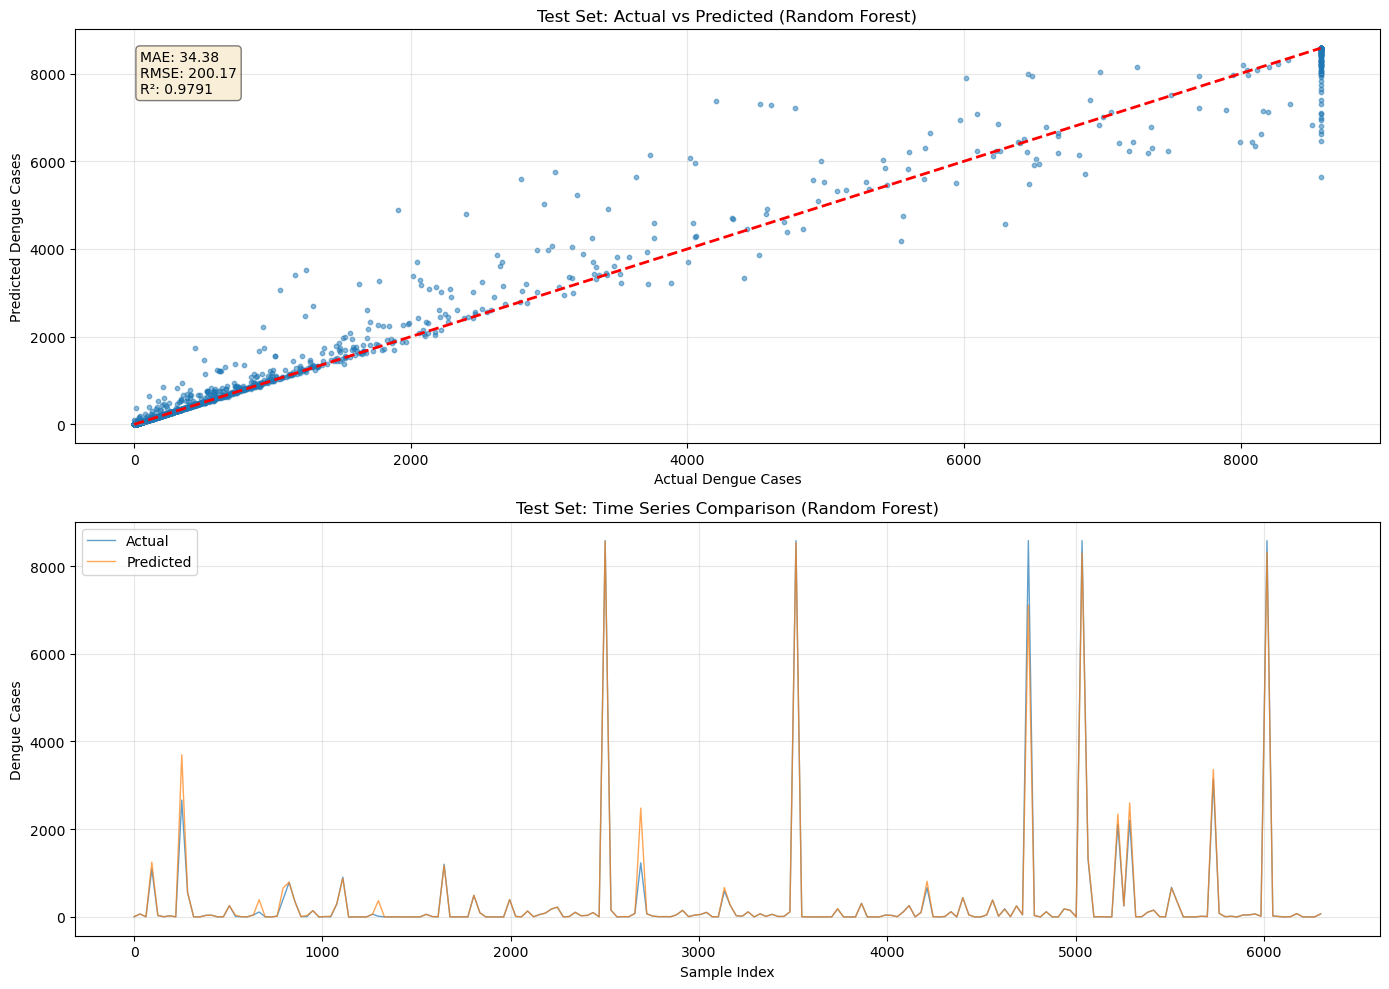

In [69]:
# Visualize test set predictions
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Scatter plot
axes[0].scatter(y_test, y_test_pred_aligned, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Dengue Cases')
axes[0].set_ylabel('Predicted Dengue Cases')
axes[0].set_title(f'Test Set: Actual vs Predicted ({best_model_name})')
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'MAE: {test_metrics["MAE"]:.2f}\nRMSE: {test_metrics["RMSE"]:.2f}\nR²: {test_metrics["R2"]:.4f}',
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Time series plot (sample of test set)
sample_size = min(200, len(y_test))
indices = np.linspace(0, len(y_test)-1, sample_size, dtype=int)
axes[1].plot(indices, y_test[indices], label='Actual', alpha=0.7, linewidth=1)
axes[1].plot(indices, y_test_pred_aligned[indices], label='Predicted', alpha=0.7, linewidth=1)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Dengue Cases')
axes[1].set_title(f'Test Set: Time Series Comparison ({best_model_name})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [70]:
# Save model and artifacts
import joblib
import pickle

print("\n" + "=" * 60)
print("SAVING MODEL ARTIFACTS")
print("=" * 60)

# Create directory for saved models
import os
os.makedirs('saved_models', exist_ok=True)

# Save best model
if best_model_name in ['Prophet', 'AutoARIMA']:
    # Save using pickle for Prophet/AutoARIMA
    with open(f'saved_models/{best_model_name.lower()}_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
elif best_model_name == 'LSTM':
    # Save Keras model
    best_model.save(f'saved_models/{best_model_name.lower()}_model.h5')
else:
    # Save sklearn models
    joblib.dump(best_model, f'saved_models/{best_model_name.lower().replace(" ", "_")}_model.pkl')

# Save scaler
joblib.dump(scaler, 'saved_models/scaler.pkl')

# Save label encoders
with open('saved_models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save feature names
with open('saved_models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)

# Save metadata
metadata = {
    'model_name': best_model_name,
    'feature_cols': feature_cols,
    'target_col': target_col,
    'train_metrics': results[best_model_name]['train'],
    'val_metrics': results[best_model_name]['val'],
    'test_metrics': results[best_model_name]['test'],
    'test_ts_metrics': results[best_model_name]['test_ts']
}

with open('saved_models/model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print(f"✓ Saved {best_model_name} model")
print(f"✓ Saved scaler")
print(f"✓ Saved label encoders")
print(f"✓ Saved feature names")
print(f"✓ Saved model metadata")

# Create prediction function
def predict_dengue_cases(features_dict):
    """
    Predict dengue cases for new data
    
    Parameters:
    -----------
    features_dict : dict
        Dictionary with feature names as keys and values as feature values
    
    Returns:
    --------
    prediction : float
        Predicted dengue cases
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([features_dict])
    
    # Encode categoricals
    for col in categorical_cols:
        if col in input_df.columns and col in label_encoders:
            try:
                input_df[f'{col}_encoded'] = label_encoders[col].transform([str(features_dict[col])])
            except:
                input_df[f'{col}_encoded'] = 0
    
    # Prepare feature vector
    input_features = input_df[[f'{col}_encoded' if col in categorical_cols else col 
                               for col in feature_cols]].fillna(0)
    
    # Scale
    input_scaled = scaler.transform(input_features)
    
    # Predict
    prediction = best_model.predict(input_scaled)[0]
    
    return max(0, prediction)  # Ensure non-negative

print(f"\n✓ Prediction function created")
print(f"\nExample usage:")
print(f"  prediction = predict_dengue_cases({{'temperature': 25, 'humidity': 70, ...}})")



SAVING MODEL ARTIFACTS
✓ Saved Random Forest model
✓ Saved scaler
✓ Saved label encoders
✓ Saved feature names
✓ Saved model metadata

✓ Prediction function created

Example usage:
  prediction = predict_dengue_cases({'temperature': 25, 'humidity': 70, ...})


In [71]:
# Final summary
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df):,} samples")
print(f"Features: {len(feature_cols)}")
print(f"Target: {target_col}")
print(f"\nBest Model: {best_model_name}")
print(f"\nPerformance Metrics:")
print(f"  Training Set:")
print(f"    MAE:  {results[best_model_name]['train']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['train']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['train']['R2']:.4f}")
print(f"\n  Validation Set:")
print(f"    MAE:  {results[best_model_name]['val']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['val']['R2']:.4f}")
print(f"\n  Test Set:")
print(f"    MAE:  {results[best_model_name]['test']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['test']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['test']['R2']:.4f}")
print(f"    MAPE: {results[best_model_name]['test']['MAPE']:.2f}%")
print(f"    Directional Accuracy: {results[best_model_name]['test_ts']['Directional_Accuracy']:.2f}%")

print(f"\n✓ Model artifacts saved in 'saved_models/' directory")
print(f"✓ Pipeline complete!")



FINAL SUMMARY

Dataset: 41,997 samples
Features: 52
Target: dengue_total

Best Model: Random Forest

Performance Metrics:
  Training Set:
    MAE:  2.86
    RMSE: 25.16
    R²:   0.9994

  Validation Set:
    MAE:  47.27
    RMSE: 264.71
    R²:   0.9556

  Test Set:
    MAE:  34.38
    RMSE: 200.17
    R²:   0.9791
    MAPE: 5.75%
    Directional Accuracy: 99.46%

✓ Model artifacts saved in 'saved_models/' directory
✓ Pipeline complete!
